In [1]:
import os
import torch

import pickle

from utils.utils import data_v
from Model_DoseFormer.DoseFormer_v2_lite import cnn_lstm_attention_gt
import datetime



def read_data(path = 'data/test_data.pkl',device='cpu'):
    file = open(path, 'rb')
    data = pickle.load(file)
    file.close()
    for i in data:
        data[i] = data[i].to(device)

    return data['allseq2t'],data['allst'],data['y']


allseq2t,allst,y = read_data('data/test_data.pkl','cuda:0')


In [2]:
import torch.nn.functional as F
import torch
from utils.utils import accuracy, test_para_sen_spc
tg = torch.load('Model_Save/_Train_DoseFormer_lr0.0000435/model.pkl')
tg.float()
tg.cuda()
tg.eval()
out ,adj= tg(allseq2t,allst)

acc = accuracy(out,y)
accp , lr = test_para_sen_spc(out,y)
accp , lr

(tensor(0.9291, device='cuda:0', dtype=torch.float64),
 [125, 452, 42, 2, 0.984251968503937, 0.9149797570850202])

In [3]:
import torch.nn.functional as F
import torch
from utils.utils import accuracy, test_para_sen_spc
tg = torch.load('Model_Save/_Train_DoseFormer_lr0.0000435/model.pkl')
tg.float()
tg.cpu()
tg.eval()
out ,adj= tg(allseq2t,allst)



acc = accuracy(out,y)
accp , lr = test_para_sen_spc(out,y)
accp , lr

(tensor(0.9291, dtype=torch.float64),
 [125, 452, 42, 2, 0.984251968503937, 0.9149797570850202])

## 621 Test Data

In [6]:
import os
import torch

import pickle

from utils.utils import data_v
from Model_DoseFormer.DoseFormer_v2_lite import cnn_lstm_attention_gt
import datetime



def read_data(path = 'data/test_data.pkl',device='cpu'):
    file = open(path, 'rb')
    data = pickle.load(file)
    file.close()
    for i in data:
        data[i] = data[i].to(device)

    return data['allseq2t'],data['allst'],data['y']


allseq2t_621,allst_621,y_621 = read_data('data/test_data.pkl','cpu')

In [8]:
import pandas as pd
age = []
weight = []
height = []
bmi = []
asa = []
pain = []
pain_pred = []
for i, j, o in zip(allst_621, y_621, out):
    age.append(int(i[-6]))
    weight.append(float(i[-3]))
    height.append(int(i[-4]))
    bmi.append(float(i[-2]))
    asa.append(int(i[-5]))
    pain.append(int(j))
    pain_pred.append(int(o))

df = pd.DataFrame({"Height": height,
                   "Weight": weight,
                   "BMI": bmi,
                   "Age": age,
                   "ASA": asa,
                   "Pain": pain,
                   "Pain_pred": pain_pred})
df.to_csv("621体征数据_新.csv", index=False)
df

,Height,Weight,BMI,Age,ASA,Pain,Pain_pred
0,180,78.0,24.0,41,2,1,1
1,154,59.0,24.0,55,2,1,1
2,156,58.0,23.0,61,2,0,0
3,158,65.0,26.0,69,2,1,1
4,160,52.0,20.0,70,2,0,0
...,...,...,...,...,...,...,...
616,165,63.0,23.0,83,2,1,0
617,165,63.0,23.0,83,2,1,0
618,158,47.0,19.0,61,2,1,0
619,169,78.0,27.0,46,2,1,0


In [9]:
import numpy as np
sum((np.array(pain_pred) == np.array(pain)).astype("int")) / len(pain_pred)

0.92914653784219

In [4]:
out = torch.argmax(out, dim=1)
out.shape

torch.Size([621])

In [7]:
y_621.shape

torch.Size([621])

In [4]:
x_sta = pd.read_excel("X_static.xls")
x_sta

,Sex,Height,Weight,BMI,Age,ASA,IncisionLevel,Position,AnesthesiaMethod,Anesthetist,...,OperationType_Class7,OperationType_Class8,OperationType_Class9,OperationType_Class10,OperationType_Class11,OperationType_Class12,OperationType_Class13,OperationType_Class14,OperationType_Class15,OperationType_Class16
0,1,187,75.0,21.447568,16,0,1,1,0,6,...,0,1,0,0,0,0,0,0,0,0
1,1,180,78.9,24.351852,41,2,1,4,2,10,...,0,0,1,0,1,0,0,0,0,0
2,0,167,48.0,17.211087,16,2,1,1,1,2,...,0,1,0,0,0,0,0,0,0,0
3,1,172,53.0,17.915089,15,0,1,1,2,15,...,0,1,0,0,0,0,0,0,0,0
4,0,154,59.0,24.877720,55,2,1,4,2,16,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1,170,70.0,24.221453,52,3,3,3,2,8,...,0,0,0,1,1,0,0,0,0,0
766,0,160,60.0,23.437500,66,2,3,4,2,15,...,0,0,0,0,1,0,0,0,0,0
767,1,175,75.0,24.489796,30,2,4,3,2,6,...,0,0,1,0,1,0,0,0,0,0
768,0,153,58.5,24.990388,59,2,4,4,2,13,...,1,0,0,0,0,0,0,0,0,0


In [5]:
idx = []
for i, row in df.iterrows():
    h = row["Height"]
    w = row["Weight"]
    a = row["Age"]
    b = row["BMI"]
    find = False
    for j, row2 in x_sta.iterrows():
        if int(h) == int(row2["Height"]) and int(w) == int(row2["Weight"]) and int(a) == int(row2["Age"]) and int(b) == int(row2["BMI"]):
            idx.append(j)
            find = True
            break
    if not find:
        idx.append(-1)

In [6]:
len(idx)

621

In [7]:
for i, row in df.iterrows():
    if idx[i] == -1:
        idx[i] = 568

In [8]:
x_dy = pd.read_excel("X_dynamic.xls")
dy_stat = x_dy.loc[idx]
dy_stat

,SystolicArterialPressureMax,SystolicArterialPressureMin,SystolicArterialPressureMedian,SystolicArterialPressureMean,SystolicArterialPressureStd,DiastolicArterialPressureMax,DiastolicArterialPressureMin,DiastolicArterialPressureMedian,DiastolicArterialPressureMean,DiastolicArterialPressureStd,...,DrugAndDosage_Oxycodone_mg,DrugAndDosage_Fentanyl_mg,PesticideEffect_intra,PesticideEffect_post,DurationTime_OperatingRoom_min,DurationTime_Operation_min,DurationTime_Anesthesia_min,area_SAP,area_HR,area_OS
1,212,117,151.0,157.300000,24.281263,115,66,87.0,85.275000,10.370326,...,6.0,0.0,6.337136,0.760456,110,40,70,24.945455,12.520455,17.727273
4,170,71,140.0,138.820513,21.740944,100,45,82.0,80.256410,9.722695,...,5.0,0.0,8.474576,0.847458,80,35,60,19.852500,10.877500,17.350000
7,160,71,117.5,115.315789,22.893532,81,46,67.0,65.842105,9.476932,...,0.0,0.0,8.620690,0.000000,160,89,120,15.835106,8.875000,16.404255
11,184,1,146.5,135.727273,32.419920,85,48,69.0,67.204545,8.721962,...,0.0,0.0,7.610350,1.522070,160,98,130,21.322368,10.182018,18.140351
12,244,75,136.5,135.000000,30.838072,180,54,73.0,75.210526,20.401514,...,0.0,0.1,9.615385,0.000000,105,62,90,20.511940,12.523881,17.619403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,169,83,119.0,121.614458,21.259625,76,42,55.0,56.614458,9.861872,...,5.0,0.0,7.936508,0.793651,282,233,265,20.398185,11.856855,18.495968
683,169,83,119.0,121.614458,21.259625,76,42,55.0,56.614458,9.861872,...,5.0,0.0,7.936508,0.793651,282,233,265,20.398185,11.856855,18.495968
685,211,93,137.0,143.196429,36.234680,108,49,74.0,73.339286,16.825845,...,0.0,0.1,12.552301,0.000000,180,117,170,21.636066,13.225410,18.852459
635,183,93,129.0,132.543478,21.362175,95,40,69.0,70.847826,12.650810,...,0.0,0.0,6.410256,0.000000,147,96,130,23.077558,12.962046,19.277228


In [9]:
test_x = []
for i, item in enumerate(allst_621):
    dy_ft = torch.tensor(dy_stat.iloc[i].to_list(), dtype=torch.float32)
    x = torch.cat([item,  dy_ft], dim=0)
    test_x.append(x)
test_x = torch.stack(test_x)

In [10]:
test_y = y_621

## Train

In [35]:
import numpy as np
import pandas as pd

In [25]:
def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

In [26]:
def accuracy_with_th(output, labels, th):
    preds = output[:, 1].greater(th).type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

In [27]:
def test_para_sen_spc(out,y, th):
    def pyacc(output, labels):
        preds = output.max(1)[1].type_as(labels)
        correct = preds.eq(labels).double()
        correct = correct.sum()
        return correct / len(labels)
    valacc = pyacc(out,y)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    # yp = torch.argmax(out,dim=1)
    yp = [1 if i[1] > th else 0 for i in out]
        

    for i,j in zip(yp,y):
        if i == 1 and j == 1:
            TP+=1
        if i == 1 and j == 0:
            FP+=1
        if i == 0 and j == 0:
            TN += 1
        if i == 0 and j == 1:
            FN += 1
    
    if TP == 0 or TP+FN == 0 :
        sen = 0
    else:
        sen = TP/(TP+FN)
    if TN == 0 or TN+FP == 0 :
        spe = 0
    else:
        spe = TN/(TN+FP)
    TPR = sen
    
    if FP == 0 or FP+TN == 0 :
        FPR = 0
    else:
        FPR = FP/(FP+TN)
    
    return valacc , [TP,TN,FP,FN,sen,spe], [TPR, FPR]

In [31]:
def calAUC(prob,labels):
    f = list(zip(prob,labels))
    rank = [values2 for values1,values2 in sorted(f,key=lambda x:x[0])]
    rankList = [i+1 for i in range(len(rank)) if rank[i]==1]
    posNum = 0
    negNum = 0
    for i in range(len(labels)):
        if(labels[i]==1):
            posNum+=1
        else:
            negNum+=1
    auc = 0
    
    auc = float(sum(rankList)- (posNum*(posNum+1))/2)/(posNum*negNum)
    return auc

In [21]:
new_x = new_x.cpu()
new_y = new_y.cpu()
test_x = test_x.cpu()
test_y = test_y.cpu()

### LR

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, tol=1e-4)
model.fit(new_x, new_y)

LogisticRegression(max_iter=10000)

In [23]:
yp = model.predict_proba(test_x)
yp

array([[0.46685503, 0.53314497],
       [0.34520534, 0.65479466],
       [0.96650014, 0.03349986],
       ...,
       [0.39767918, 0.60232082],
       [0.78334314, 0.21665686],
       [0.70342836, 0.29657164]])

In [28]:
yp = torch.tensor(yp, dtype=torch.float)
# acc = accuracy(yp, test_y)
acc = accuracy_with_th(yp, test_y, 0.25)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.25)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

621 test ACC: 0.7326892109500805

TP, TN, FP, FN, sensitivity, specificity: 
[121, 334, 120, 46, 0.7245508982035929, 0.73568281938326]

TPR, FPR: 
[0.7245508982035929, 0.2643171806167401]


C:\Users\dapig\AppData\Local\Temp\ipykernel_9920\3742904054.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yp = torch.tensor(yp, dtype=torch.float)


In [324]:
idx = torch.cat([idx_train, idx_val, idx_test], dim=0)
import pandas as pd
import numpy as np
tpr = []
fpr = []

for th in np.linspace(0, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_lr = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_lr["algo"] = "LR"
tf_df_lr

,tpr,fpr,algo
0,0.000000,0.000000,LR
1,0.000000,0.000000,LR
2,0.005988,0.002203,LR
3,0.011976,0.002203,LR
4,0.059880,0.004405,LR
5,0.077844,0.006608,LR
6,0.107784,0.030837,LR
7,0.173653,0.033040,LR
8,0.299401,0.046256,LR
9,0.389222,0.077093,LR


Text(29.375, 0.5, 'True Positive Rate')

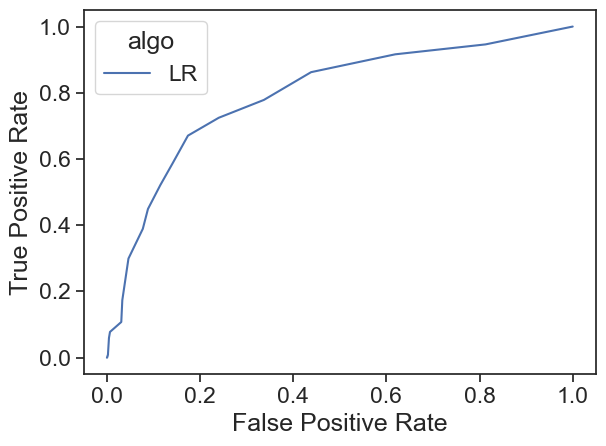

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_lr, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [424]:
calAUC(yp[:, 1], test_y)

0.7955498694241473

In [29]:
Method = []
ACC = []
TP = []
TN = []
FP = []
FN = []
SEN = []
SPE = []
TPR = []
FPR = []
Threshold = []
AUC = []

In [32]:
Method.append("LR")
acc = accuracy_with_th(yp, test_y, 0.25)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.25)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.25)
AUC.append(calAUC(yp[:, 1], test_y))

### SVM

In [33]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

clf = make_pipeline(StandardScaler(),LinearSVC(tol=1e-4, max_iter=10000,))
clf.fit(new_x, new_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=10000))])

In [36]:
yp = 1. / (1 + np.exp(-clf.decision_function(test_x)))
yp = np.stack([1-yp, yp]).T
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy_with_th(yp, test_y, 0.38)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.38)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

621 test ACC: 0.7439613526570048

TP, TN, FP, FN, sensitivity, specificity: 
[124, 338, 116, 43, 0.7425149700598802, 0.7444933920704846]

TPR, FPR: 
[0.7425149700598802, 0.2555066079295154]


In [329]:
tpr = []
fpr = []

for th in np.linspace(0, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_svm = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_svm["algo"] = "SVM"
tf_df_svm

,tpr,fpr,algo
0,0.000000,0.000000,SVM
1,0.000000,0.000000,SVM
2,0.000000,0.000000,SVM
3,0.000000,0.000000,SVM
4,0.017964,0.000000,SVM
5,0.023952,0.002203,SVM
6,0.089820,0.011013,SVM
7,0.191617,0.022026,SVM
8,0.347305,0.052863,SVM
9,0.479042,0.092511,SVM


Text(29.375, 0.5, 'True Positive Rate')

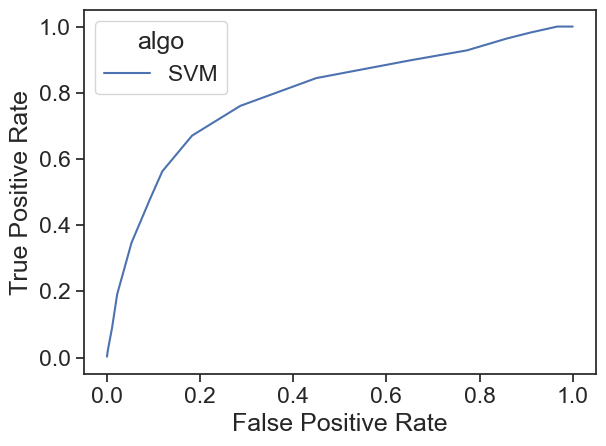

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_svm, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [331]:
calAUC(yp[:, 1], test_y)

0.7944551425782795

In [37]:
Method.append("SVM")
acc = accuracy_with_th(yp, test_y, 0.38)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.38)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.38)
AUC.append(calAUC(yp[:, 1], test_y))

### ~~DT~~

In [183]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(new_x, new_y)

DecisionTreeClassifier(random_state=0)

In [187]:
clf.predict_proba(test_x)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
yp = 1. / (1 + np.exp(-clf.decision_function(test_x)))
yp = np.stack([1-yp, yp]).T
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy(yp, test_y)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.5)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(new_x, new_y)

KNeighborsClassifier(n_neighbors=11)

In [39]:
yp = neigh.predict_proba(test_x)
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy_with_th(yp, test_y, 0.2)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.2)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 


621 test ACC: 0.6151368760064412

TP, TN, FP, FN, sensitivity, specificity: 
[98, 284, 170, 69, 0.5868263473053892, 0.6255506607929515]

TPR, FPR: 
[0.5868263473053892, 0.3744493392070485]


In [335]:
tpr = []
fpr = []

for th in np.linspace(-0.05, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_knn = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_knn["algo"] = "KNN"
tf_df_knn 

,tpr,fpr,algo
0,0.000000,0.000000,KNN
1,0.000000,0.000000,KNN
2,0.000000,0.000000,KNN
3,0.000000,0.000000,KNN
4,0.000000,0.000000,KNN
5,0.000000,0.000000,KNN
6,0.000000,0.000000,KNN
7,0.000000,0.002203,KNN
8,0.000000,0.002203,KNN
9,0.023952,0.004405,KNN


Text(29.375, 0.5, 'True Positive Rate')

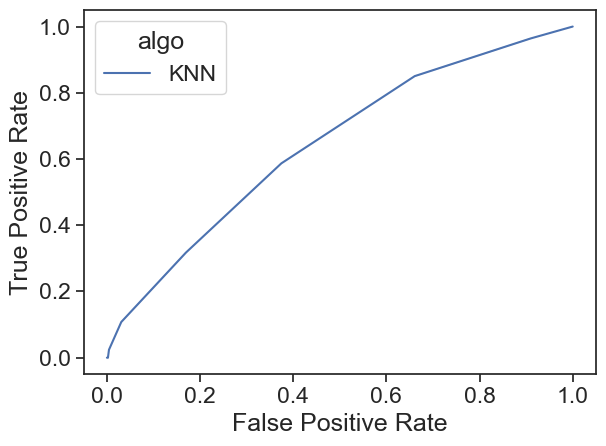

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_knn, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [337]:
calAUC(yp[:, 1], test_y)

0.6620987100688491

In [40]:
Method.append("KNN")
acc = accuracy_with_th(yp, test_y, 0.2)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.2)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.2)
AUC.append(calAUC(yp[:, 1], test_y))

### RF

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(new_x, new_y)

RandomForestClassifier(max_depth=2, random_state=0)

In [42]:
yp = clf.predict_proba(test_x)
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy_with_th(yp, test_y, 0.25)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.25)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

621 test ACC: 0.7326892109500805

TP, TN, FP, FN, sensitivity, specificity: 
[118, 337, 117, 49, 0.7065868263473054, 0.7422907488986784]

TPR, FPR: 
[0.7065868263473054, 0.2577092511013216]


In [345]:
tpr = []
fpr = []

for th in np.linspace(0, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_rf = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_rf["algo"] = "RF"
tf_df_rf 

,tpr,fpr,algo
0,0.000000,0.000000,RF
1,0.000000,0.000000,RF
2,0.000000,0.000000,RF
3,0.000000,0.000000,RF
4,0.000000,0.000000,RF
5,0.000000,0.000000,RF
6,0.000000,0.000000,RF
7,0.000000,0.000000,RF
8,0.000000,0.000000,RF
9,0.000000,0.000000,RF


Text(29.375, 0.5, 'True Positive Rate')

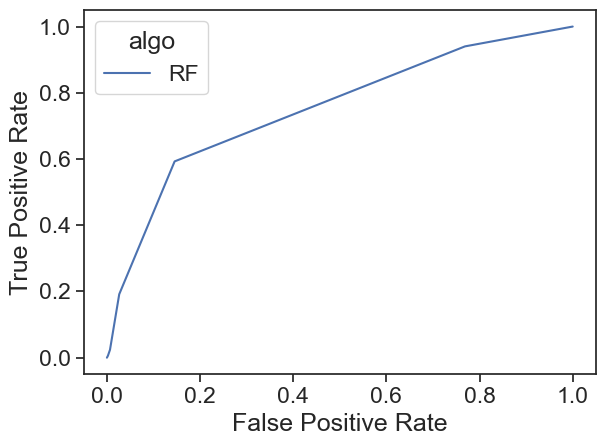

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_rf, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [348]:
calAUC(yp[:, 1], test_y)

0.7866997282967105

In [43]:
Method.append("RF")
acc = accuracy_with_th(yp, test_y, 0.25)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.25)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.25)
AUC.append(calAUC(yp[:, 1], test_y))

### ET

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(new_x, new_y)

ExtraTreesClassifier(random_state=0)

In [45]:
yp = clf.predict_proba(test_x)
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy_with_th(yp, test_y, 0.3)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.3)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

621 test ACC: 0.8743961352657005

TP, TN, FP, FN, sensitivity, specificity: 
[132, 411, 43, 35, 0.7904191616766467, 0.9052863436123348]

TPR, FPR: 
[0.7904191616766467, 0.0947136563876652]


In [362]:
tpr = []
fpr = []

for th in np.linspace(-0.001, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_et = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_et["algo"] = "ET"
tf_df_et 

,tpr,fpr,algo
0,0.000000,0.000000,ET
1,0.706587,0.074890,ET
2,0.706587,0.074890,ET
3,0.706587,0.074890,ET
4,0.706587,0.074890,ET
5,0.706587,0.074890,ET
6,0.706587,0.074890,ET
7,0.706587,0.074890,ET
8,0.724551,0.074890,ET
9,0.736527,0.077093,ET


Text(29.375, 0.5, 'True Positive Rate')

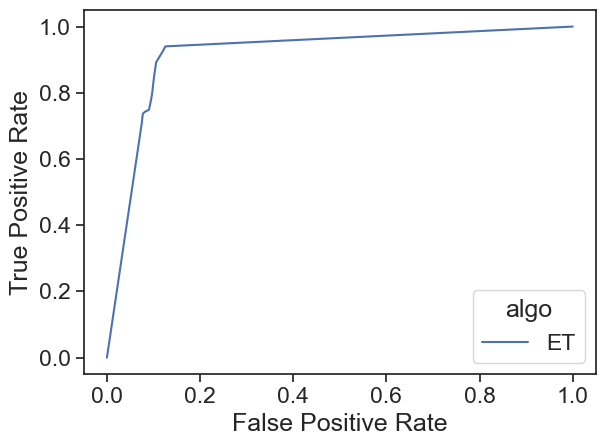

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_et, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [364]:
calAUC(yp[:, 1], test_y)

0.9191089187264238

In [46]:
Method.append("ET")
acc = accuracy_with_th(yp, test_y, 0.3)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.3)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.3)
AUC.append(calAUC(yp[:, 1], test_y))

### xgb

In [47]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100).fit(new_x, new_y)

In [48]:
yp = clf.predict_proba(test_x)
yp = torch.tensor(yp, dtype=torch.float)
acc = accuracy_with_th(yp, test_y, 0.3)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.3)
print("621 test ACC: {}".format(acc))
print()
print("TP, TN, FP, FN, sensitivity, specificity: \n{}".format(lr))
print()
print("TPR, FPR: \n{}".format(tf)) 

621 test ACC: 0.8743961352657005

TP, TN, FP, FN, sensitivity, specificity: 
[126, 417, 37, 41, 0.7544910179640718, 0.9185022026431718]

TPR, FPR: 
[0.7544910179640718, 0.08149779735682819]


In [378]:
tpr = []
fpr = []

for th in np.linspace(0, 1, 20):
    accp , lr, tf = test_para_sen_spc(yp, test_y, th)
    accp , lr, tf
    tpr.append(tf[0])
    fpr.append(tf[1])

tf_df_xbg = pd.DataFrame({"tpr": tpr[::-1], "fpr": fpr[::-1]})
tf_df_xbg["algo"] = "XGBoost"
tf_df_xbg 

,tpr,fpr,algo
0,0.000000,0.000000,XGBoost
1,0.688623,0.070485,XGBoost
2,0.718563,0.074890,XGBoost
3,0.730539,0.074890,XGBoost
4,0.730539,0.079295,XGBoost
5,0.730539,0.079295,XGBoost
6,0.730539,0.079295,XGBoost
7,0.736527,0.079295,XGBoost
8,0.736527,0.079295,XGBoost
9,0.736527,0.079295,XGBoost


Text(29.375, 0.5, 'True Positive Rate')

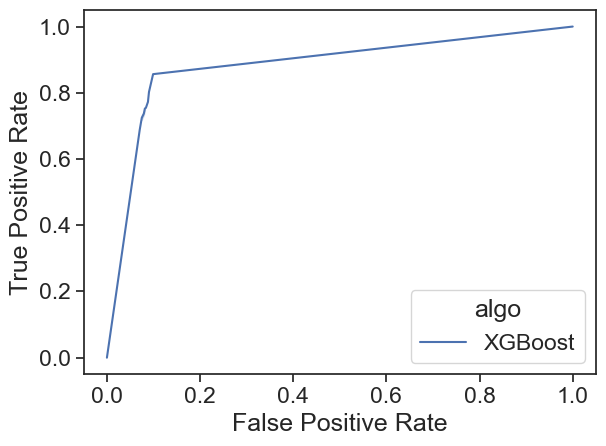

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_xbg, x="fpr", y="tpr", hue="algo")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

In [380]:
calAUC(yp[:, 1], test_y)

0.9214962146192197

In [49]:
Method.append("XGBoost")
acc = accuracy_with_th(yp, test_y, 0.3)
accp , lr, tf = test_para_sen_spc(yp, test_y, 0.3)
ACC.append(acc)
TP.append(lr[0])
TN.append(lr[1])
FP.append(lr[2])
FN.append(lr[3])
SEN.append(lr[4])
SPE.append(lr[5])
TPR.append(tf[0])
FPR.append(tf[1])
Threshold.append(0.3)
AUC.append(calAUC(yp[:, 1], test_y))

## Plot

In [389]:
tf_df_df = pd.read_csv("doseformer_roc.csv")
tf_df_df["Method"] = "DoseFormer"
tf_df_df = tf_df_df.iloc[:, 1:]

In [390]:
tf_df_xbg["Method"]="XGBoost"
tf_df_et["Method"]="ET"
tf_df_rf["Method"]="RF"
tf_df_knn["Method"]="KNN"
tf_df_svm["Method"]="SVM"
tf_df_lr["Method"]="LR"

tf_df_all = pd.concat([tf_df_df, tf_df_lr, tf_df_svm, tf_df_knn, tf_df_rf, tf_df_et, tf_df_xbg])

In [391]:
tf_df_all = tf_df_all.reset_index(drop=True)
tf_df_all

,tpr,fpr,Method,algo
0,0.000000,0.000000,DoseFormer,NaN
1,0.855932,0.012788,DoseFormer,NaN
2,0.864407,0.012788,DoseFormer,NaN
3,0.881356,0.012788,DoseFormer,NaN
4,0.898305,0.017903,DoseFormer,NaN
...,...,...,...,...
135,0.754491,0.083700,XGBoost,XGBoost
136,0.772455,0.088106,XGBoost,XGBoost
137,0.802395,0.090308,XGBoost,XGBoost
138,0.856287,0.099119,XGBoost,XGBoost


In [407]:
tf_df_all = tf_df_all.iloc[:, 0:-1]

In [408]:
tf_df_all.to_csv("roc_all.csv", index=False)

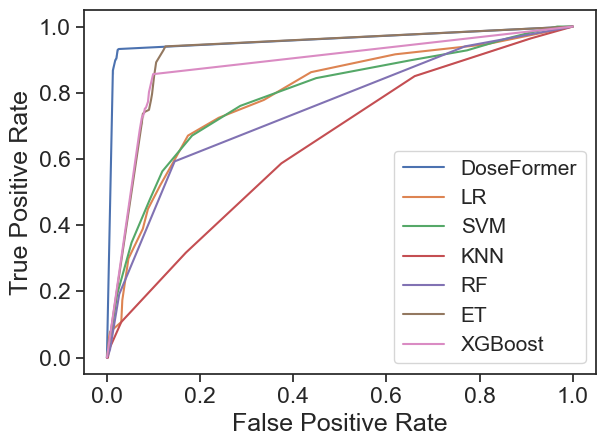

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.set_context("paper")
sns.set(style="ticks", font_scale=1.5)
g = sns.lineplot(data=tf_df_all, x="fpr", y="tpr", hue="Method")
plt.tight_layout()
g.set_xlabel("False Positive Rate")
g.set_ylabel("True Positive Rate")

sns.move_legend(g, "lower right", bbox_to_anchor=(1.0, 0.001), title=None, fontsize=15)
plt.savefig("roc.svg", format="svg")

In [409]:
plt.savefig("roc.svg")

<Figure size 640x480 with 0 Axes>

In [50]:
Method.append("DoseFormer")
# acc = accuracy_with_th(yp, test_y, 0.25)
# accp , lr, tf = test_para_sen_spc(yp, test_y, 0.5)
ACC.append(0.9291)
TP.append(125)
TN.append(452)
FP.append(42)
FN.append(2)
SEN.append(0.984251968503937)
SPE.append(0.9149797570850202)
TPR.append(0.984251968503937)
FPR.append(0.0850202429149798)
Threshold.append(0.5)
AUC.append(0.9775456239975725)

In [71]:
data_statistics = pd.DataFrame(
    {
        "Method": Method[1:],
        "ACC": ACC[1:],
        "TP": TP[1:],
        "TN": TN[1:],
        "FP": FP[1:],
        "FN": FN[1:],
        "SEN": SEN[1:],
        "SPE": SPE[1:],
        "TPR": TPR[1:],
        "FPR": FPR[1:],
        "AUC": AUC,
        "Threshold": Threshold[1:]
    }
)
data_statistics["ACC"] = data_statistics["ACC"].apply(lambda x: x.item() if isinstance(x, torch.Tensor) else x)
data_statistics

,Method,ACC,TP,TN,FP,FN,SEN,SPE,TPR,FPR,AUC,Threshold
0,LR,0.732689,121,334,120,46,0.724551,0.735683,0.724551,0.264317,0.795550,0.25
1,SVM,0.743961,124,338,116,43,0.742515,0.744493,0.742515,0.255507,0.794455,0.38
2,KNN,0.615137,98,284,170,69,0.586826,0.625551,0.586826,0.374449,0.662099,0.20
3,RF,0.732689,118,337,117,49,0.706587,0.742291,0.706587,0.257709,0.786700,0.25
4,ET,0.874396,132,411,43,35,0.790419,0.905286,0.790419,0.094714,0.919109,0.30
5,XGBoost,0.874396,126,417,37,41,0.754491,0.918502,0.754491,0.081498,0.921496,0.30
6,DoseFormer,0.929100,125,452,42,2,0.984252,0.914980,0.984252,0.085020,0.977546,0.50


In [64]:
AUC

[0.7955498694241473,
 0.7944551425782795,
 0.6620987100688491,
 0.7866997282967105,
 0.9191089187264238,
 0.9214962146192197,
 0.9775456239975725]